In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp gdrive/"My Drive"/dataset-rocky-all-feats.csv ./

In [0]:
from fastai import *
from fastai.tabular import *

In [0]:
from fastai.basics import *

In [0]:
df = pd.read_csv('dataset-rocky-all-feats.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 46 columns):
hab_lbl                      1713 non-null int64
P. Zone Class                1713 non-null int64
P. Mass Class                1713 non-null int64
P. Composition Class         1713 non-null int64
P. Atmosphere Class          1713 non-null int64
P. Min Mass (EU)             1713 non-null float64
P. Mass (EU)                 1713 non-null float64
P. Radius (EU)               1713 non-null float64
P. Density (EU)              1713 non-null float64
P. Gravity (EU)              1713 non-null float64
P. Esc Vel (EU)              1713 non-null float64
P. SFlux Min (EU)            1713 non-null float64
P. SFlux Mean (EU)           1713 non-null float64
P. SFlux Max (EU)            1713 non-null float64
P. Teq Min (K)               1713 non-null float64
P. Teq Mean (K)              1713 non-null float64
P. Teq Max (K)               1713 non-null float64
P. Ts Min (K)                1713 no

In [0]:
df = df.drop('P. Habitable', axis=1)

In [168]:
df.head()

,hab_lbl,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),...,S. Appar Mag,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI
0,0,2,2,2,2,18.217914,8.10,1.99,1.03,2.05,...,6.0,-35.2,33.0178,0.591,1.419,-2.39,0.06,-0.81,0.28,0.26
1,0,2,2,3,2,5.090000,5.09,1.66,1.10,1.84,...,4.7,-32.9,10.0643,0.656,1.556,-2.35,-0.15,-0.69,0.29,0.27
2,0,2,4,3,3,1.140000,1.14,1.09,0.89,0.97,...,1.3,-33.0,11.5197,0.545,1.306,-2.33,-0.17,-1.12,0.28,0.30
3,0,2,2,3,2,11.770000,16.31,2.23,1.47,3.28,...,11.0,-29.7,2.0522,0.694,1.636,-1.96,-0.13,0.61,0.33,0.33
4,0,2,2,3,2,8.580000,8.58,1.91,1.23,2.35,...,6.7,-33.4,20.5046,0.735,1.832,-2.26,-0.14,-0.54,0.30,0.26


In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]

In [0]:
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [171]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]

In [0]:
cont_vars = cont_vars.tolist()

In [174]:
len(cont_vars) + len(cat_vars)

44

In [0]:
procs = [Normalize, Categorify]

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.2)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [177]:
data

TabularDataBunch;

Train: LabelList (1371 items)
x: TabularList
P. Zone Class 2; P. Mass Class 2; P. Composition Class 2; P. Atmosphere Class 2; P. Min Mass (EU) 0.0067; P. Mass (EU) -0.0491; P. Radius (EU) 0.6163; P. Density (EU) -0.0620; P. Gravity (EU) -0.0429; P. Esc Vel (EU) 0.0973; P. SFlux Min (EU) 0.0666; P. SFlux Mean (EU) 0.0733; P. SFlux Max (EU) 0.0804; P. Teq Min (K) 2.1388; P. Teq Mean (K) 2.1911; P. Teq Max (K) 2.2399; P. Ts Min (K) 2.1503; P. Ts Mean (K) 2.2028; P. Ts Max (K) 2.2519; P. Surf Press (EU) -0.0312; P. Mag -1.9904; P. Appar Size (deg) 0.6131; P. Period (days) -0.0943; P. Sem Major Axis (AU) -0.3470; P. Eccentricity 0.2822; P. Mean Distance (AU) -0.3377; P. Inclination (deg) 1.6485; P. Omega (deg) 3.9863; S. Mass (SU) 0.1374; S. Radius (SU) 0.1169; S. Teff (K) -0.1141; S. Luminosity (SU) -0.2909; S. [Fe/H] 2.7965; S. Age (Gyrs) 4.5352; S. Appar Mag -4.0650; S. Mag from Planet -1.7242; S. Size from Planet (deg) 3.8426; S. Hab Zone Min (AU) -0.1402; S. Hab Zone

In [178]:
data.cat_names

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [179]:
data.classes

[0, 1, 2]

In [0]:
# We want more than just L2, which is provided by fastai by default. So ps and 
# emb_drop adds dropout regularization
learn = tabular_learner(data, layers=[1000,500], ps=[0.01,0.1], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [195]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=56, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.01)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=500, out_features=3, bias=True)
  )
)

In [196]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


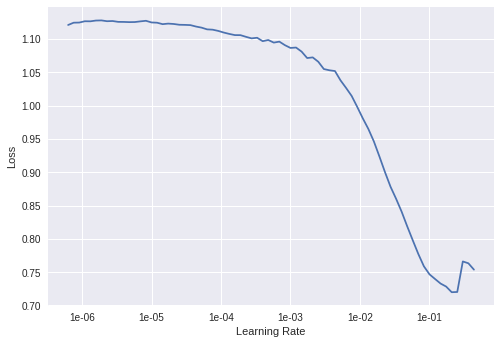

In [197]:
learn.recorder.plot()

In [199]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.011290,0.022953,0.985380,00:00
2,0.009992,0.024453,0.994152,00:00
3,0.022006,0.048309,0.988304,00:00
4,0.041492,0.157031,0.988304,00:00
5,0.044659,0.018687,0.991228,00:00
6,0.033585,0.022249,0.991228,00:00
7,0.029566,0.020039,0.991228,00:00
8,0.023528,0.018866,0.991228,00:00
9,0.020009,0.018610,0.991228,00:00
10,0.017435,0.018448,0.991228,00:00


In [0]:
interp = learn.interpret()

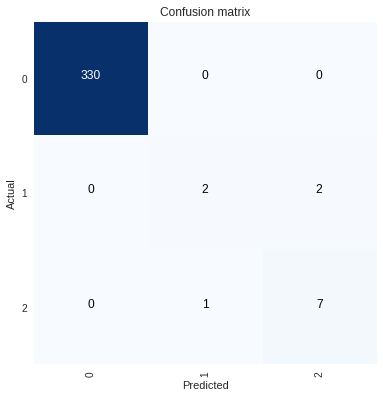

In [201]:
interp.plot_confusion_matrix()

In [0]:
matrix = interp.confusion_matrix()

In [203]:
matrix

array([[330,   0,   0],
       [  0,   2,   2],
       [  0,   1,   7]])

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
def get_metrics(matrix):
    preds = []
    targs = []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            for k in range(matrix[i][j]):
                targs.append(i)
                preds.append(j)
    
    print('Accuracy score:', accuracy_score(targs, preds))
    print('Class-wise accuracy:')
    print([matrix[i][i] for i in range(len(matrix))] / np.sum(matrix, axis=1))
    print('Classification report:')
    print(classification_report(targs, preds))

In [207]:
get_metrics(matrix)

Accuracy score: 0.9912280701754386
Class-wise accuracy:
[1.    0.5   0.875]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       0.67      0.50      0.57         4
           2       0.78      0.88      0.82         8

   micro avg       0.99      0.99      0.99       342
   macro avg       0.81      0.79      0.80       342
weighted avg       0.99      0.99      0.99       342



## Only 6 features

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-restricted-feat-set.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-restricted-feat-set.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 7 columns):
hab_lbl               1713 non-null int64
P. Min Mass (EU)      1713 non-null float64
P. Mass (EU)          1713 non-null float64
P. Radius (EU)        1713 non-null float64
P. SFlux Min (EU)     1713 non-null float64
P. SFlux Mean (EU)    1713 non-null float64
P. SFlux Max (EU)     1713 non-null float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [211]:
cat_vars

[]

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.3)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [214]:
data

TabularDataBunch;

Train: LabelList (1200 items)
x: TabularList
P. Min Mass (EU) 0.0324; P. Mass (EU) -0.0367; P. Radius (EU) 0.6252; P. SFlux Min (EU) 0.0840; P. SFlux Mean (EU) 0.0912; P. SFlux Max (EU) 0.0989; ,P. Min Mass (EU) -0.6216; P. Mass (EU) -0.1510; P. Radius (EU) -0.0508; P. SFlux Min (EU) -0.0342; P. SFlux Mean (EU) -0.0310; P. SFlux Max (EU) -0.0266; ,P. Min Mass (EU) -0.8184; P. Mass (EU) -0.3010; P. Radius (EU) -1.2183; P. SFlux Min (EU) -0.0300; P. SFlux Mean (EU) -0.0303; P. SFlux Max (EU) -0.0306; ,P. Min Mass (EU) -0.2888; P. Mass (EU) 0.2752; P. Radius (EU) 1.1168; P. SFlux Min (EU) -0.0468; P. SFlux Mean (EU) -0.0470; P. SFlux Max (EU) -0.0474; ,P. Min Mass (EU) -0.4478; P. Mass (EU) -0.0184; P. Radius (EU) 0.4613; P. SFlux Min (EU) -0.0216; P. SFlux Mean (EU) -0.0219; P. SFlux Max (EU) -0.0222; 
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (513 items)
x: TabularList
P. Min Mass (EU) 0.0324; P. Mass (EU) -0.2668; P. Radius (EU) -0.8086; P. SFlux Min (EU) 

In [0]:
import fastai

In [0]:
learn = tabular_learner(data, layers=[10,5], ps=[0.01,0.1], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [216]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.01)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [217]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


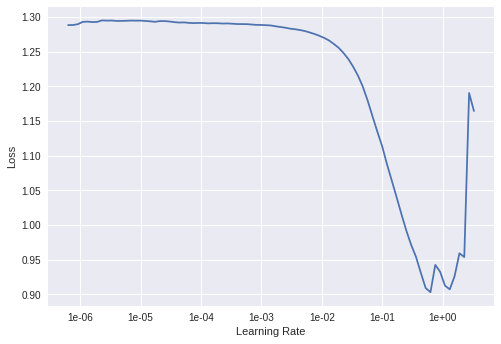

In [218]:
learn.recorder.plot()

In [219]:
learn.fit_one_cycle(10, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
1,1.207425,1.023358,0.962963,00:00
2,0.828111,0.145710,0.970760,00:00
3,0.507584,0.181970,0.970760,00:00
4,0.343478,0.186689,0.970760,00:00
5,0.254009,0.165373,0.968811,00:00
6,0.194948,0.147871,0.970760,00:00
7,0.154552,0.172047,0.970760,00:00
8,0.134006,0.170472,0.970760,00:00
9,0.118204,0.158740,0.970760,00:00
10,0.105157,0.159073,0.970760,00:00


In [0]:
interp = learn.interpret()

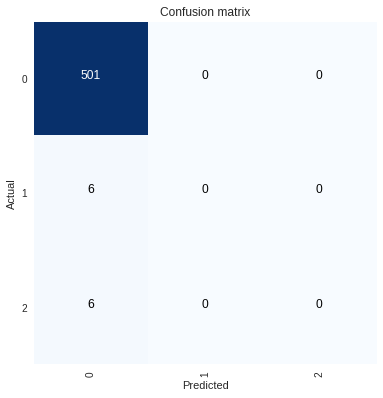

In [145]:
interp.plot_confusion_matrix()

In [147]:
get_metrics(interp.confusion_matrix())

Accuracy score: 0.9766081871345029
Class-wise accuracy:
[1. 0. 0.]
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       501
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6

   micro avg       0.98      0.98      0.98       513
   macro avg       0.33      0.33      0.33       513
weighted avg       0.95      0.98      0.97       513



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Without surface temp

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-no-STemp.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-no-STemp.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 43 columns):
hab_lbl                      1713 non-null int64
P. Zone Class                1713 non-null int64
P. Mass Class                1713 non-null int64
P. Composition Class         1713 non-null int64
P. Atmosphere Class          1713 non-null int64
P. Min Mass (EU)             1713 non-null float64
P. Mass (EU)                 1713 non-null float64
P. Radius (EU)               1713 non-null float64
P. Density (EU)              1713 non-null float64
P. Gravity (EU)              1713 non-null float64
P. Esc Vel (EU)              1713 non-null float64
P. SFlux Min (EU)            1713 non-null float64
P. SFlux Mean (EU)           1713 non-null float64
P. SFlux Max (EU)            1713 non-null float64
P. Teq Min (K)               1713 non-null float64
P. Teq Mean (K)              1713 non-null float64
P. Teq Max (K)               1713 non-null float64
P. Surf Press (EU)           1713 no

In [0]:
df = df.drop('P. Habitable', axis=1)

In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [153]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.2)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [156]:
data

TabularDataBunch;

Train: LabelList (1371 items)
x: TabularList
P. Zone Class 2; P. Mass Class 2; P. Composition Class 2; P. Atmosphere Class 2; P. Min Mass (EU) 0.0087; P. Mass (EU) -0.0503; P. Radius (EU) 0.6435; P. Density (EU) -0.0630; P. Gravity (EU) -0.0434; P. Esc Vel (EU) 0.1064; P. SFlux Min (EU) 0.0654; P. SFlux Mean (EU) 0.0721; P. SFlux Max (EU) 0.0791; P. Teq Min (K) 2.0656; P. Teq Mean (K) 2.1160; P. Teq Max (K) 2.1606; P. Surf Press (EU) -0.0319; P. Mag -1.9456; P. Appar Size (deg) 0.6403; P. Period (days) -0.0944; P. Sem Major Axis (AU) -0.3410; P. Eccentricity 0.2617; P. Mean Distance (AU) -0.3324; P. Inclination (deg) 1.4447; P. Omega (deg) 3.6446; S. Mass (SU) 0.1266; S. Radius (SU) 0.1132; S. Teff (K) -0.1185; S. Luminosity (SU) -0.2924; S. [Fe/H] 2.8319; S. Age (Gyrs) 4.4594; S. Appar Mag -4.0512; S. Mag from Planet -1.6697; S. Size from Planet (deg) 3.6733; S. Hab Zone Min (AU) -0.1423; S. Hab Zone Max (AU) -0.1232; P. HZD -0.1833; P. HZC 1.4839; P. HZA -0.4698; P

In [0]:
learn = tabular_learner(data, layers=[10,5], ps=[0.001,0.01], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [158]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(37, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=53, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [159]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


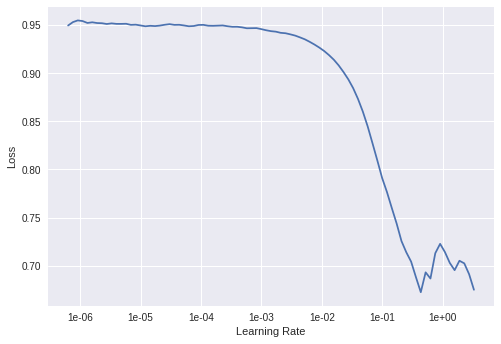

In [160]:
learn.recorder.plot()

In [161]:
learn.fit_one_cycle(10, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.832402,0.670953,0.967836,00:00
2,0.507236,0.045812,0.976608,00:00
3,0.295812,0.025153,0.976608,00:00
4,0.195619,0.035485,0.991228,00:00
5,0.130140,0.026568,0.991228,00:00
6,0.090432,0.023071,0.991228,00:00
7,0.069896,0.037762,0.976608,00:00
8,0.057618,0.021429,0.991228,00:00
9,0.049564,0.023954,0.991228,00:00
10,0.040301,0.026728,0.991228,00:00


In [0]:
interp = learn.interpret()

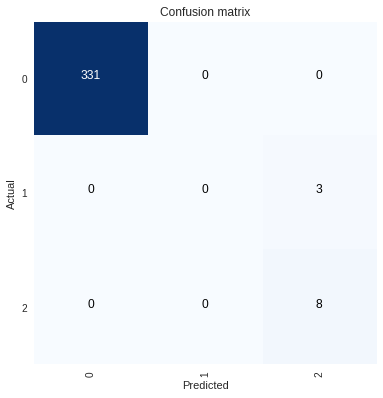

In [163]:
interp.plot_confusion_matrix()

In [164]:
get_metrics(interp.confusion_matrix())

Accuracy score: 0.9912280701754386
Class-wise accuracy:
[1. 0. 1.]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.00      0.00      0.00         3
           2       0.73      1.00      0.84         8

   micro avg       0.99      0.99      0.99       342
   macro avg       0.58      0.67      0.61       342
weighted avg       0.98      0.99      0.99       342



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
